# Ejercicios 2

### 1. Crea una caja en 2d de tamaño 1000 con las siguientes distribuciones:

#### a) puntos en una malla cuadriculada de distancia (10x10 cada retícula)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from pylab import rcParams

rcParams['figure.figsize'] = (10, 10)

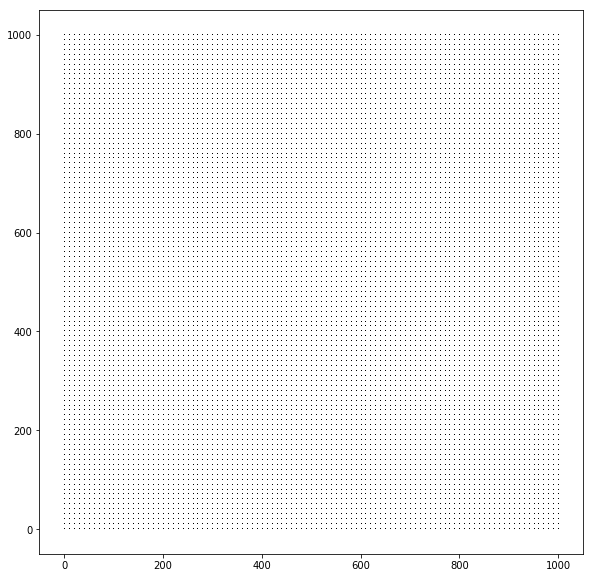

In [16]:
box_size = 1000.0
dist = 10.0
malla_x = np.arange(0.0, box_size + 1.0, dist)

for x in malla_x:
    y = x * np.ones(int(box_size / dist) + 1)
    plt.plot(malla_x, y, ',', color = 'black')
    
plt.gca().set_aspect('equal')

#### b) 1000 puntos sobre un disco de radio 300

Text(0.5,1,'Dist. no uniforme y centrada en el centro de la caja')

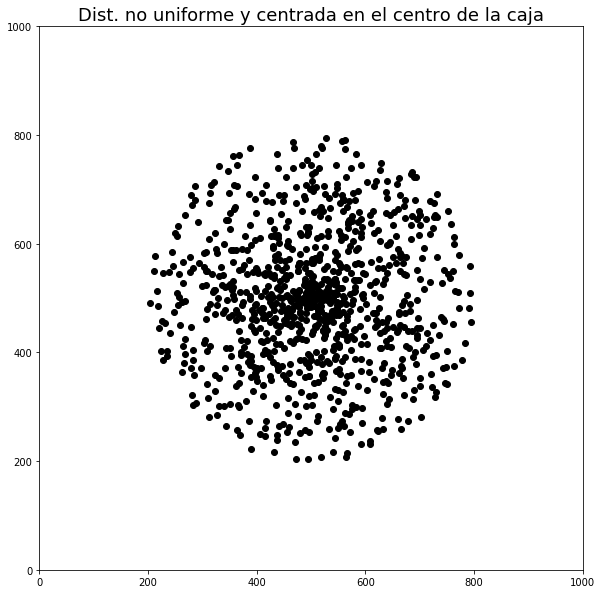

In [31]:
X = []
Y = []
box_size = 1000
n_points = 1000
radius = 300.0
# Coordenadas del centro del disco
x_0 = box_size / 2.0
y_0 = box_size / 2.0

for i in range(n_points):
    theta = 2.0 * math.pi * random.random()
    r = radius * random.random()
    x = x_0 + r * math.cos(theta)
    y = y_0 + r * math.sin(theta)
    
    X.append(x)
    Y.append(y)
        
plt.plot(X, Y, 'ko')
plt.gca().set_aspect('equal')
plt.xlim([0, box_size])
plt.ylim([0, box_size])
plt.title('Dist. no uniforme y centrada en el centro de la caja', fontsize = 18)

Text(0.5,1,'Dist. uniforme y centrada en una esquina de la caja')

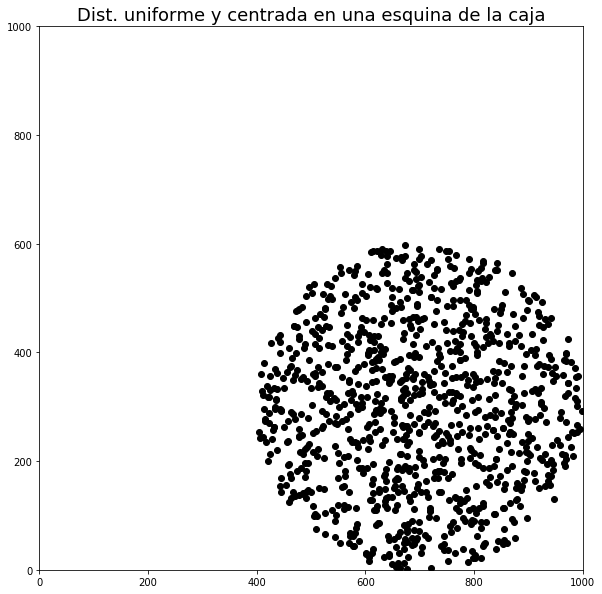

In [6]:
X = []
Y = []
box_size = 1000
n_points = 1000
radius = 300.0
# Coordenadas del centro del disco
x_0 = box_size - radius
y_0 = radius

for i in range(n_points):
    x = x_0 + 2.0 * radius * random.random() - radius
    y = y_0 + 2.0 * radius * random.random() - radius

    while (x - x_0)**2 + (y - y_0)**2 > radius**2:
        x = x_0 + 2.0 * radius * random.random() - radius
        y = y_0 + 2.0 * radius * random.random() - radius

    X.append(x)
    Y.append(y)
        
plt.plot(X, Y, 'ko')
plt.gca().set_aspect('equal')
plt.xlim([0, box_size])
plt.ylim([0, box_size])
plt.title('Dist. uniforme y centrada en una esquina de la caja', fontsize = 18)

#### c) 1000 puntos sobre un anillo con radio mayor 300 y radio menor 290 

(0, 1000)

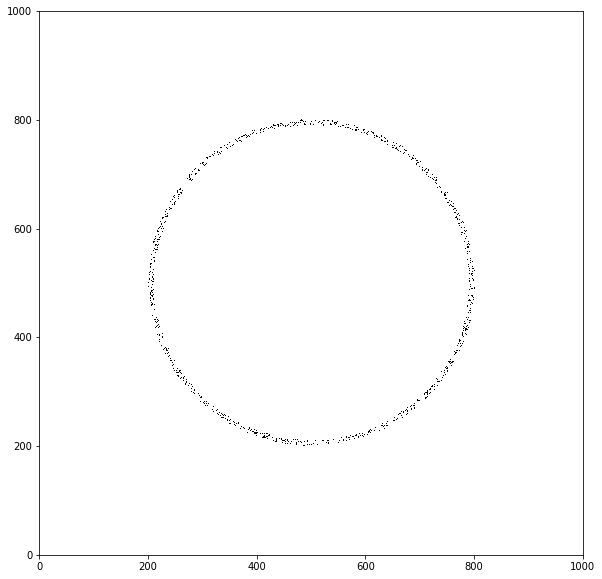

In [11]:
X = []
Y = []
box_size = 1000
n_points = 1000
r1 = 300.0
r2 = 290.0
# Coordenadas del centro del anillo
x_0 = box_size / 2.0
y_0 = box_size / 2.0

for i in range(n_points):
    theta = 2.0 * math.pi * random.random()
    r = r2 + (r1 - r2) * random.random()
    x = x_0 + r * math.cos(theta)
    y = y_0 + r * math.sin(theta)
    
    X.append(x)
    Y.append(y)
        
plt.plot(X, Y, 'k,')
plt.gca().set_aspect('equal')
plt.xlim([0, box_size])
plt.ylim([0, box_size])

#### d) 50 anillos con 100 puntos cada uno cuyos centros están distribuidos aleatoriamente sobre la caja